In [1]:
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
models = ['bcc-csm1-1','CanESM2','CCSM4','CNRM-CM5','CSIRO-Mk3-6-0','GFDL-CM3','GISS-E2-R','HadGEM2-ES','inmcm4','IPSL-CM5A-LR','MIROC-ESM','MIROC5','MRI-CGCM3','NorESM1-M']

In [3]:
mpl.rcParams['xtick.labelsize']       = 12
mpl.rcParams['ytick.labelsize']       = 12
mpl.rcParams['axes.labelsize']        = 12
#mpl.rcParams['axes.labelweight']      = 'bold'
mpl.rcParams['axes.titlesize']        = 12
#mpl.rcParams['axes.titleweight']      = 'bold'
mpl.rcParams['figure.subplot.bottom'] = .01
mpl.rcParams['figure.subplot.top']    = .99
mpl.rcParams['figure.subplot.left']   = .01
mpl.rcParams['figure.subplot.right']  = .99
mpl.rcParams['figure.subplot.wspace'] = .02
mpl.rcParams['figure.subplot.hspace'] = .0
mpl.rcParams['figure.figsize']        = 15,9

vmin = -150
vmax = 150
cmap = plt.get_cmap('RdBu_r',20)

In [4]:
#Function to load time slice
def load_ts(model,scen):
    with xr.open_dataset(f'../data/totalrsl/{model}_{scen}.nc') as ds:
        ds = ds.isel(time=-2)
        slr = ds['SLR'].values
        lon = ds['lon'].values
        lat = ds['lat'].values
    return lon,lat,slr

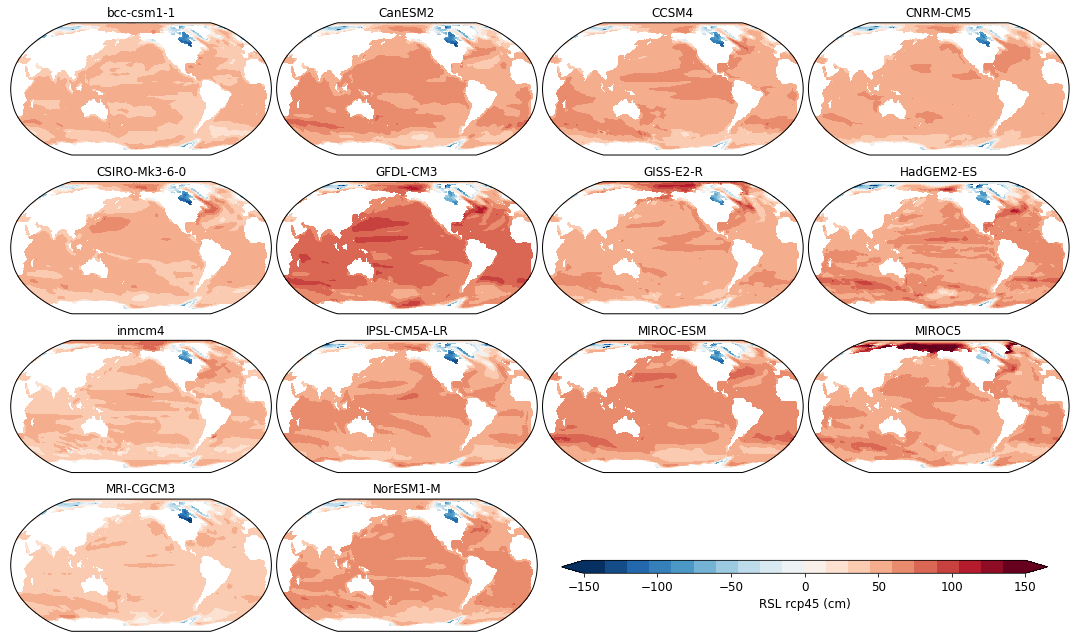

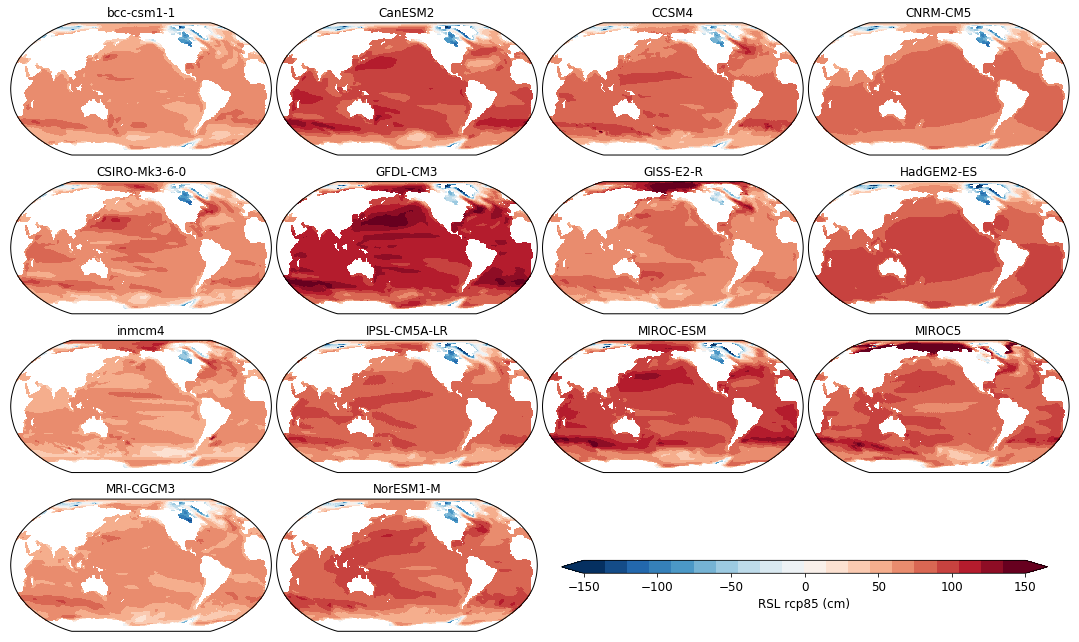

In [5]:
for scen in ['rcp45','rcp85']:
    fig = plt.figure()

    for m,model in enumerate(models):
        ax = fig.add_subplot(4,4,m+1,projection=ccrs.Robinson(central_longitude=200))
        lon,lat,slr = load_ts(model,scen)

        im = ax.pcolormesh(lon,lat,slr,transform=ccrs.PlateCarree(),vmin=vmin,vmax=vmax,cmap=cmap)
        ax.set_global()
        ax.set_title(model)

    cax = fig.add_axes([.52,.12,.45,.02])
    cb = plt.colorbar(im,cax=cax,extend='both',orientation='horizontal')
    cb.set_label(f'RSL {scen} (cm)')

    plt.savefig(f'global_{scen}.png')
    plt.show()